## Importing the Dataset and First look


In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [47]:
#Reading the csv file using pandas
data = pd.read_csv('Train.csv')

In [48]:
#Checking the first values of the  dataset
data.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [49]:
#Checking the last values of the  dataset
data.tail()

,ID,Datetime,Count
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580
18287,18287,25-09-2014 23:00,534


In [50]:
#Checking the shape of the dataset
data.shape

(18288, 3)

In [51]:
data.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [52]:
data.columns

Index(['ID', 'Datetime', 'Count'], dtype='object')

In [53]:
data.describe

<bound method NDFrame.describe of           ID          Datetime  Count
0          0  25-08-2012 00:00      8
1          1  25-08-2012 01:00      2
2          2  25-08-2012 02:00      6
3          3  25-08-2012 03:00      2
4          4  25-08-2012 04:00      2
...      ...               ...    ...
18283  18283  25-09-2014 19:00    868
18284  18284  25-09-2014 20:00    732
18285  18285  25-09-2014 21:00    702
18286  18286  25-09-2014 22:00    580
18287  18287  25-09-2014 23:00    534

[18288 rows x 3 columns]>

In [54]:
data.isnull

<bound method DataFrame.isnull of           ID          Datetime  Count
0          0  25-08-2012 00:00      8
1          1  25-08-2012 01:00      2
2          2  25-08-2012 02:00      6
3          3  25-08-2012 03:00      2
4          4  25-08-2012 04:00      2
...      ...               ...    ...
18283  18283  25-09-2014 19:00    868
18284  18284  25-09-2014 20:00    732
18285  18285  25-09-2014 21:00    702
18286  18286  25-09-2014 22:00    580
18287  18287  25-09-2014 23:00    534

[18288 rows x 3 columns]>

In [55]:
data.dropna()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


## Preprocessing the dataset
Check datatype of the date column is acceptable date format in python, 
if not so we can use to pandas to_datetime to convert it into required format.

In [56]:
# Function to process
def processing(df):
    # Attempt to parse the 'Datetime' column with the first format
    try:
        df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y %H:%M')
    except ValueError:
        # If the first format fails, try the second format
        df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d/%m/%Y %H:%M')
    
    df.set_index('Datetime', inplace=True)
    df = df.resample('D').mean()
    df.drop('ID', axis=1, inplace=True)
    return df

In [57]:
data = processing(data)

In [58]:
data.head()

,Count
Datetime,
2012-08-25,3.166667
2012-08-26,3.666667
2012-08-27,2.583333
2012-08-28,2.416667
2012-08-29,2.500000


## Split the data into train and test sets

In [59]:

train_size = int(0.8 * len(data))
train = data[:train_size]
test = data[train_size:]

train.head()

,Count
Datetime,
2012-08-25,3.166667
2012-08-26,3.666667
2012-08-27,2.583333
2012-08-28,2.416667
2012-08-29,2.500000


## Visualize the data

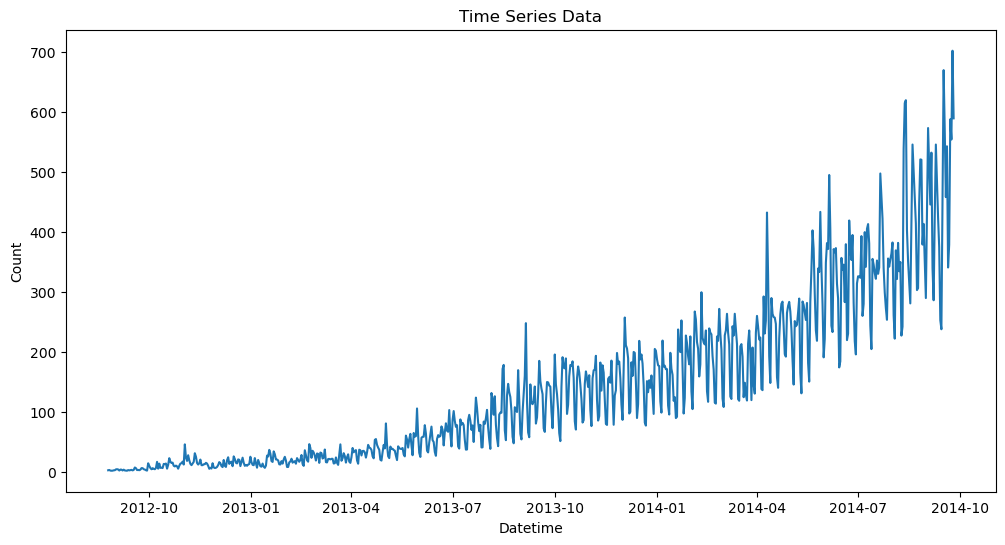

In [60]:
import matplotlib.pyplot as plt
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(data['Count'])
plt.title('Time Series Data')
plt.xlabel('Datetime')
plt.ylabel('Count')
plt.show()

## Stationarity and ADFuller Test

In [61]:
#Deriving the function of Dickey fuller test for checking the stationarity
from statsmodels.tsa.stattools import adfuller
# Function for ADFuller test
def adf_test(series):
    result = adfuller(series.dropna(), autolag='AIC')
    return result

In [62]:
# Apply the ADFuller test to time series data
result = adf_test(data["Count"])

# Display the ADFuller test result
print("ADF Statistic: %f" % result[0])
print("p-value: %f" % result[1])
print("Critical Values:")
for key, value in result[4].items():
    print("\t%s: %.3f" % (key, value))

# Interpret the result
if result[1] <= 0.05:
    print("Data is stationary")
else:
    print("Data is non-stationary")

ADF Statistic: 2.986351
p-value: 1.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569
Data is non-stationary


To make the data stationary, we do the seasonal differencing which is substracting the data next

In [63]:
#difference
data["Count_diff"] = data["Count"] - data["Count"].shift(12)
data_diff = data["Count_diff"].dropna()

data_diff.head()


Datetime
2012-09-06    1.000000
2012-09-07   -0.833333
2012-09-08    1.583333
2012-09-09    0.416667
2012-09-10    0.166667
Freq: D, Name: Count_diff, dtype: float64

In [64]:
#Checking the stationarity again
result = adf_test(data["Count_diff"])
print("ADF Statistic: %f" % result[0])
print("p-value: %f" % result[1])
print("Critical Values:")
for key, value in result[4].items():
    print("\t%s: %.3f" % (key, value))

# Interpret the result
if result[1] <= 0.05:
    print("Data is stationary")
else:
    print("Data is non-stationary")

ADF Statistic: -5.608051
p-value: 0.000001
Critical Values:
	1%: -3.439
	5%: -2.866
	10%: -2.569
Data is stationary


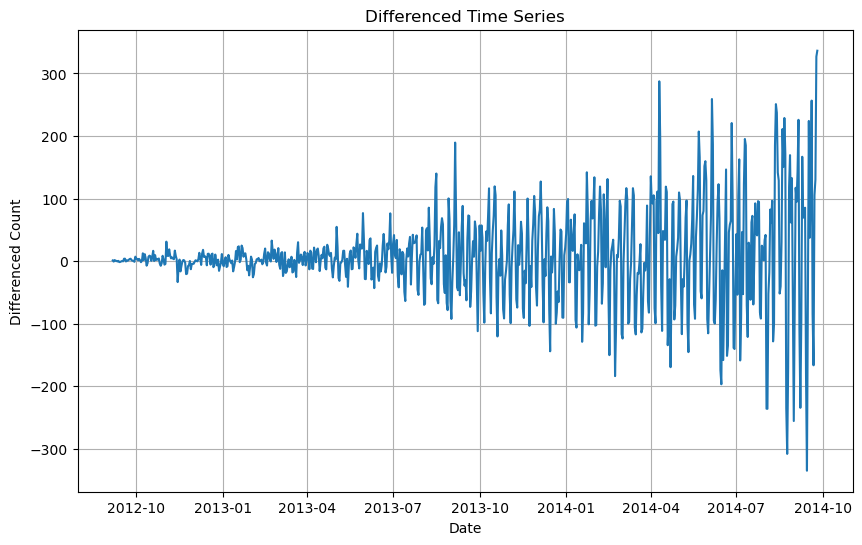

In [65]:
# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(data["Count_diff"])
plt.title("Differenced Time Series")
plt.xlabel("Date")
plt.ylabel("Differenced Count")
plt.grid(True)
plt.show()

## ACF and PACF plots
ACF is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged value

PACF is a partial auto-correlation function. Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals (which remains after removing the effects which are already explained by the earlier lag(s)) with the next lag value hence ‘partial’ and not ‘complete’ as we remove already found variations before we find the next correlation

The plots will give us the hyperparametes of time series model for prediction


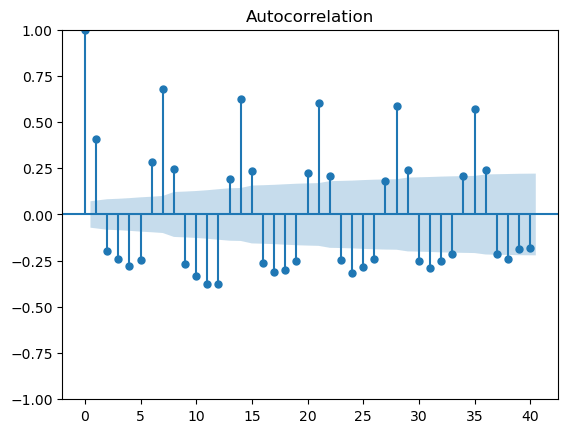

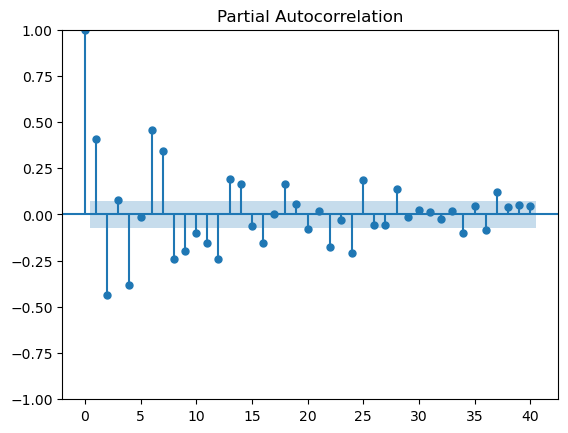

In [70]:
#Auto correlation plot and Partial correlation plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_diff, lags= 40, alpha=0.05);
plot_pacf(data_diff, lags= 40, alpha=0.05);

In [18]:
# Split the data into train and test sets
train_size = int(0.8 * len(data_diff))
train_data = data_diff[:train_size]
test_data = data_diff[train_size:]

train_data.head()


Datetime
2012-09-06    1.000000
2012-09-07   -0.833333
2012-09-08    1.583333
2012-09-09    0.416667
2012-09-10    0.166667
Freq: D, Name: Count_diff, dtype: float64

## Visualisation
Visualising the train and test data and observe how it varies with time

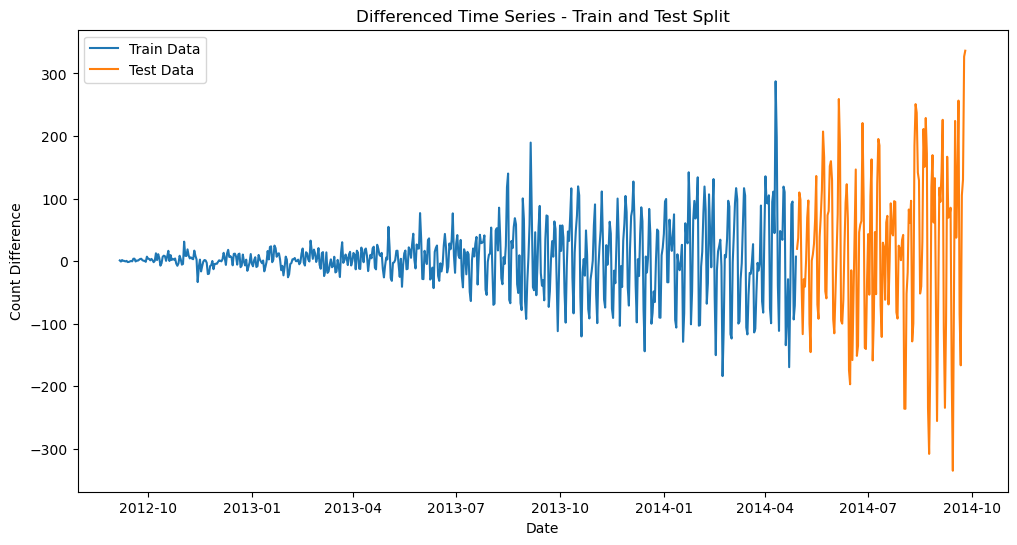

In [19]:
# Visualize the differenced train and test time series
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data')
plt.title('Differenced Time Series - Train and Test Split')
plt.xlabel('Date')
plt.ylabel('Count Difference')
plt.legend()
plt.show()

# Models in Time series forecasting

## ARIMA
Another common Time series model that is very popular among the Data scientists is ARIMA. It stand for Autoregressive Integrated Moving average. While exponential smoothing models were based on a description of trend and seasonality in the data, ARIMA models aim to describe the correlations in the data with each other.


C:\Anaconda\Anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda\Anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


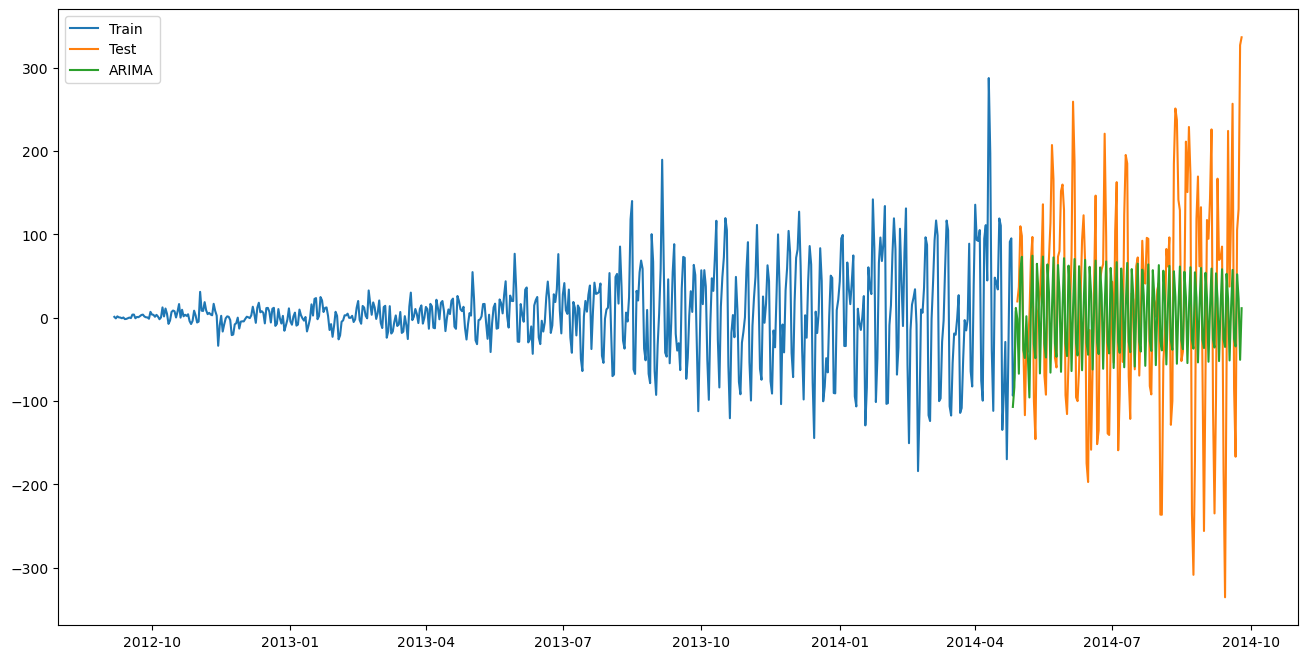

In [126]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA Model
model = ARIMA(train_data, order=(2,1,15))  
results_ARIMA = model.fit()  

forecast = test_data.copy()

# Generate forecasts
forecast['ARIMA'] = results_ARIMA.predict(start="2014-04-26", end="2014-09-25", dynamic=True)

# Visualize the results
plt.figure(figsize=(16, 8))
plt.plot(train_data.dropna(), label='Train')
plt.plot(test_data, label='Test')
plt.plot(forecast['ARIMA'], label='ARIMA')
plt.legend(loc='best')
plt.show()

In [128]:
# Calculate the RMSE
errors = test_data - forecast['ARIMA']
squared_errors = errors ** 2
mse = np.mean(squared_errors)
rmse = np.sqrt(mse)
print('RMSE:', rmse)


RMSE: 121.71800215303806


## SARIMA Model
An improvement over ARIMA is Seasonal ARIMA. It takes into account the seasonality of dataset just like Holt’ Winter method
The hyperparameter in the p,d,q and s are taken arbitarily by checking the lags in the ACF and PACF plot.

C:\Anaconda\Anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda\Anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda\Anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


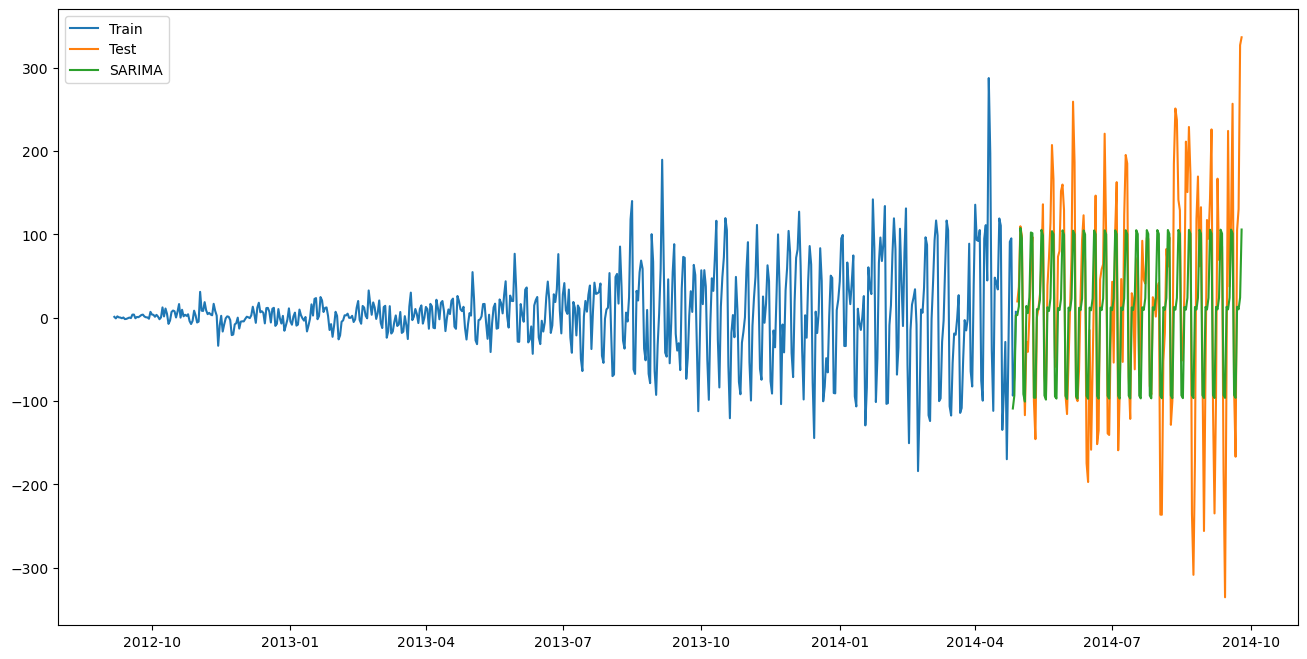

In [208]:
import statsmodels.api as sm
#order = (p,d,q)
#p- acf plot lag
#q- pacf plot lag
#d- diffencing
y_hat_avg = test_data.copy()
fit1 = sm.tsa.statespace.SARIMAX(train_data, order=(2,1,3),seasonal_order=(1,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2014-04-26", end="2014-09-25", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [209]:
# Calculate the RMSE
errors = test_data - y_hat_avg['SARIMA']
squared_errors = errors ** 2
mse = np.mean(squared_errors)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

RMSE: 87.30383104556205


## Forecasting on unseen data

In [210]:
# Load the test dataset
test_data = pd.read_csv('Test.csv')
test_data =processing(test_data)


In [211]:
test_data.head()

,Count
Datetime,
2014-09-26,NaN
2014-09-27,NaN
2014-09-28,NaN
2014-09-29,NaN
2014-09-30,NaN


In [212]:
test_data.tail()

,Count
Datetime,
2015-04-22,NaN
2015-04-23,NaN
2015-04-24,NaN
2015-04-25,NaN
2015-04-26,NaN


C:\Anaconda\Anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


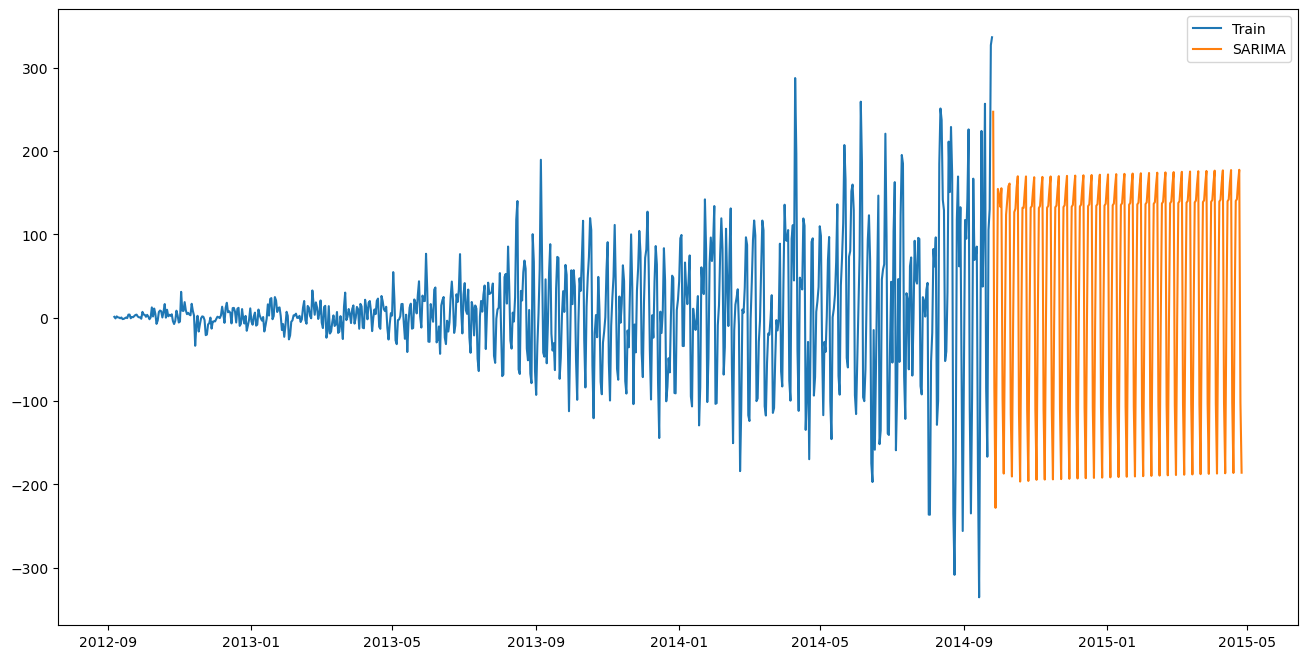

In [213]:
#order = (p,d,q)
#p- acf plot lag
#q- pacf plot lag
#d- diffencing
y_hat_avg = test_data
fit1 = sm.tsa.statespace.SARIMAX(data_diff, order=(2,1,4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2014-09-26", end="2015-04-26", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot(data_diff, label='Train')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [214]:

# Calculate the cumulative sum to convert it back to the original series
original_series = y_hat_avg.cumsum()


In [215]:
# Save the forecasted values to a CSV file
original_series.to_csv('forecasted_values.csv')